# Week4

# Implementing K-Nearest Neighbours-Breast Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset import

In [2]:
df=pd.read_csv("breast_cancer.csv")
df

,1,2,3,4,5,6,7,8,9,10,11
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


##  Rename columns as 'Id', 'Clump_thickness', 'Uniformity_Cell_Size','Uniformity_Cell_Shape', 'Marginal_Adhesion','Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin','Normal_Nucleoli', 'Mitoses', 'Class'

In [3]:
df=df.rename(columns={'1':'Id','2':'Clump_thickness','3': 'Uniformity_Cell_Size',
       '4':'Uniformity_Cell_Shape', '5':'Marginal_Adhesion',
       '6':'Single_Epithelial_Cell_Size', '7':'Bare_Nuclei', '8':'Bland_Chromatin',
       '9':'Normal_Nucleoli', '10':'Mitoses', '11':'Class'})
df

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Drop redundant columns

In [4]:
df.drop(columns=["Id"],inplace=True)#id is redundant as it is just an index(id number) so not imp in distance calculation
df

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


# View the summary of the dataset

In [5]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Convert the data type of Bare_Nuclei to an integer

In [6]:
#Bare_nuclei is object type so convert it to int and replace ? with 0
def replace_with_0(x):
    if(x=='?'):
        return 0
    else:
        return x
df["Bare_Nuclei"]=df["Bare_Nuclei"].apply(replace_with_0)
df["Bare_Nuclei"]=df["Bare_Nuclei"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_Cell_Size         699 non-null    int64
 2   Uniformity_Cell_Shape        699 non-null    int64
 3   Marginal_Adhesion            699 non-null    int64
 4   Single_Epithelial_Cell_Size  699 non-null    int64
 5   Bare_Nuclei                  699 non-null    int32
 6   Bland_Chromatin              699 non-null    int64
 7   Normal_Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


# Check data types of columns of data frame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_Cell_Size         699 non-null    int64
 2   Uniformity_Cell_Shape        699 non-null    int64
 3   Marginal_Adhesion            699 non-null    int64
 4   Single_Epithelial_Cell_Size  699 non-null    int64
 5   Bare_Nuclei                  699 non-null    int32
 6   Bland_Chromatin              699 non-null    int64
 7   Normal_Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


# Identify Missing values, NAN in variables

In [8]:
df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

# Check the distribution of variables using histograms

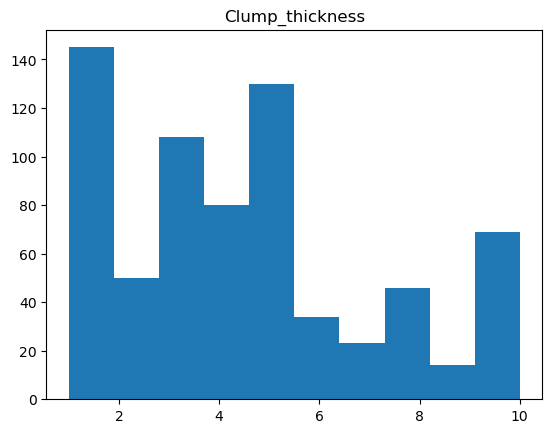

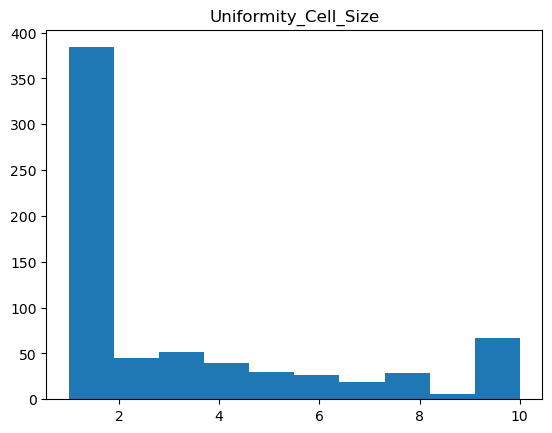

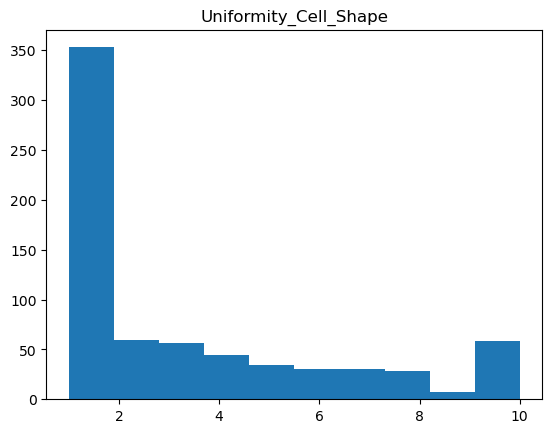

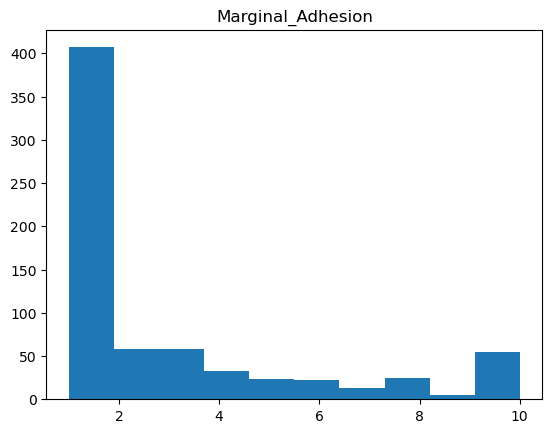

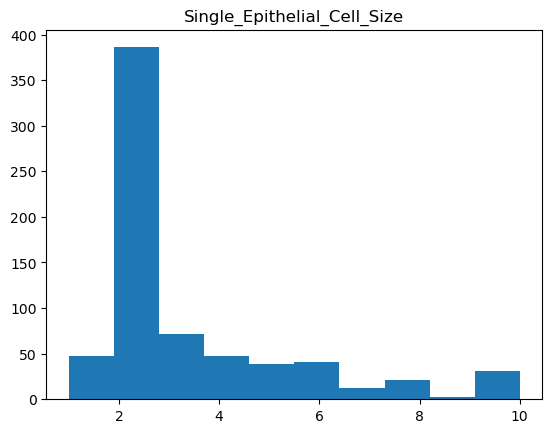

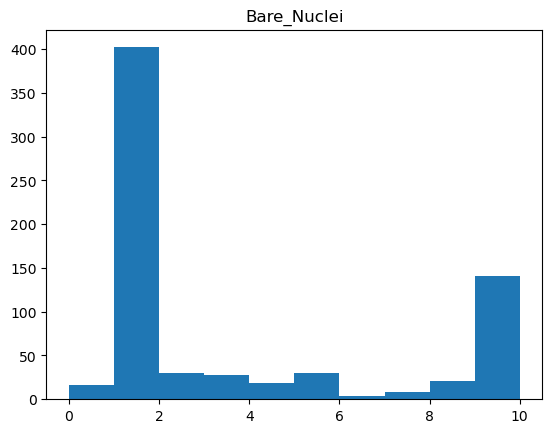

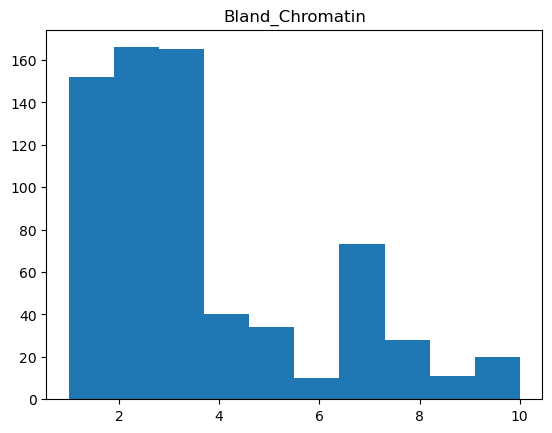

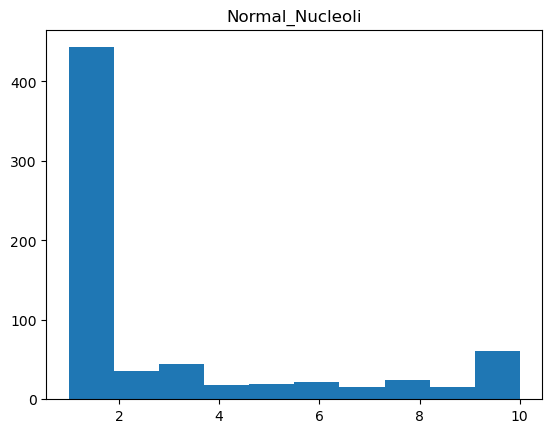

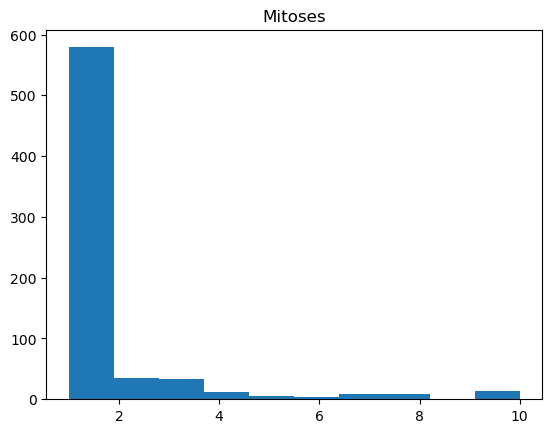

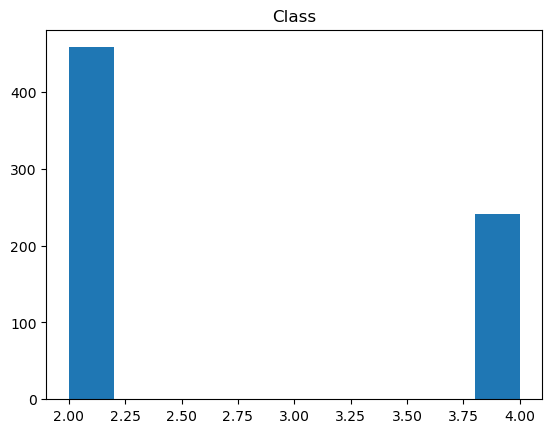

In [9]:
for column in df.columns:
    plt.title(column)
    plt.hist(x=df[column])
    plt.show()#compulsory to do this

# Estimate correlation coefficients and represent using heatmaps

<Axes: >

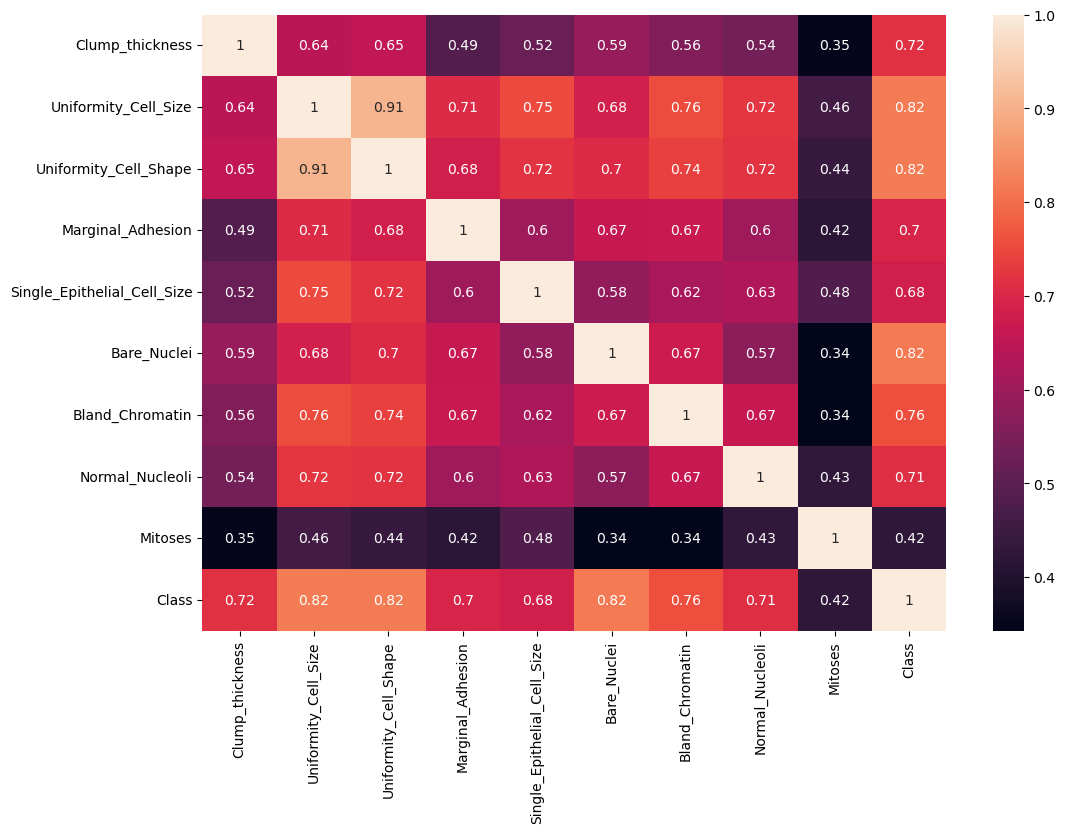

In [10]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=corr,annot=True)

In [11]:
df["Class"]=df["Class"].map({2:0,4:1})

# Declare feature vector and target variable

In [12]:
feature_vectors=df.iloc[:,:-1]
feature_vectors

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [13]:
target_variable=df.iloc[:,-1]
target_variable

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

In [14]:
target_variable.value_counts()

0    458
1    241
Name: Class, dtype: int64

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Implementing K-Nearest Neighbours with K=3

# Split data into separate training and test set

In [16]:
x_train,x_test,y_train,y_test=train_test_split(feature_vectors,target_variable,train_size=0.8,random_state=5)

In [17]:
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
129,1,1,1,1,10,1,1,1,1
574,10,9,7,3,4,2,7,7,1
445,2,1,1,1,2,1,1,1,1
488,3,6,4,10,3,3,3,4,1
605,10,5,10,3,5,8,7,8,3
...,...,...,...,...,...,...,...,...,...
8,2,1,1,1,2,1,1,1,5
73,9,4,5,10,6,10,4,8,1
400,3,10,8,7,6,9,9,3,8
118,1,1,1,1,4,3,1,1,1


In [18]:
x_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
273,7,2,4,1,3,4,3,3,1
586,8,10,10,10,6,10,10,10,1
356,5,3,3,1,3,3,3,3,3
509,2,1,1,1,2,1,1,1,1
636,10,10,7,8,7,1,10,10,3
...,...,...,...,...,...,...,...,...,...
149,8,8,7,4,10,10,7,8,7
676,1,1,2,1,2,1,2,1,1
538,4,1,1,1,2,1,2,1,1
475,3,1,1,1,2,1,1,1,1


In [19]:
y_train

129    0
574    1
445    0
488    1
605    1
      ..
8      0
73     1
400    1
118    0
206    1
Name: Class, Length: 559, dtype: int64

In [20]:
y_test

273    1
586    1
356    1
509    0
636    1
      ..
149    1
676    0
538    0
475    0
567    0
Name: Class, Length: 140, dtype: int64

# Perform Feature Scaling(Normalize)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
def scale(df):
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))
    return df

x_train=scale(x_train)

In [23]:
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
129,0.000000,0.000000,0.000000,0.000000,1.000000,0.1,0.000000,0.000000,0.000000
574,1.000000,0.888889,0.666667,0.222222,0.333333,0.2,0.666667,0.666667,0.000000
445,0.111111,0.000000,0.000000,0.000000,0.111111,0.1,0.000000,0.000000,0.000000
488,0.222222,0.555556,0.333333,1.000000,0.222222,0.3,0.222222,0.333333,0.000000
605,1.000000,0.444444,1.000000,0.222222,0.444444,0.8,0.666667,0.777778,0.222222
...,...,...,...,...,...,...,...,...,...
8,0.111111,0.000000,0.000000,0.000000,0.111111,0.1,0.000000,0.000000,0.444444
73,0.888889,0.333333,0.444444,1.000000,0.555556,1.0,0.333333,0.777778,0.000000
400,0.222222,1.000000,0.777778,0.666667,0.555556,0.9,0.888889,0.222222,0.777778
118,0.000000,0.000000,0.000000,0.000000,0.333333,0.3,0.000000,0.000000,0.000000


In [24]:
x_test=scale(x_test)
x_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
273,0.666667,0.111111,0.333333,0.000000,0.222222,0.4,0.222222,0.222222,0.000000
586,0.777778,1.000000,1.000000,1.000000,0.555556,1.0,1.000000,1.000000,0.000000
356,0.444444,0.222222,0.222222,0.000000,0.222222,0.3,0.222222,0.222222,0.222222
509,0.111111,0.000000,0.000000,0.000000,0.111111,0.1,0.000000,0.000000,0.000000
636,1.000000,1.000000,0.666667,0.777778,0.666667,0.1,1.000000,1.000000,0.222222
...,...,...,...,...,...,...,...,...,...
149,0.777778,0.777778,0.666667,0.333333,1.000000,1.0,0.666667,0.777778,0.666667
676,0.000000,0.000000,0.111111,0.000000,0.111111,0.1,0.111111,0.000000,0.000000
538,0.333333,0.000000,0.000000,0.000000,0.111111,0.1,0.111111,0.000000,0.000000
475,0.222222,0.000000,0.000000,0.000000,0.111111,0.1,0.000000,0.000000,0.000000


# Fit the K Neighbours Classifier to the training set

In [25]:
KNN=KNeighborsClassifier(n_neighbors=3)

In [26]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# Predict test-set results 

In [27]:
y_pred=KNN.predict(x_test)

In [28]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

# Check the accuracy score 

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [30]:
accuracy_3=accuracy_score(y_test,y_pred)
precision_3=precision_score(y_test,y_pred)
f1_3=f1_score(y_test,y_pred)
recall_3=recall_score(y_test,y_pred)
print("accuracy is",accuracy_3)
print("precision is",precision_3)
print("f1 is",f1_3)
print("recall is",recall_3)

accuracy is 0.9428571428571428
precision is 0.9019607843137255
f1 is 0.92
recall is 0.9387755102040817


# Compare the train-set and test-set accuracy

In [31]:
Y_pred=KNN.predict(x_train)
Train_set_accuracy=accuracy_score(y_train,Y_pred)
Train_set_accuracy

0.9856887298747764

### Train set accuracy is = 0.98 and Train size accuracy = 0.94

# Display confusion matrix

<Axes: >

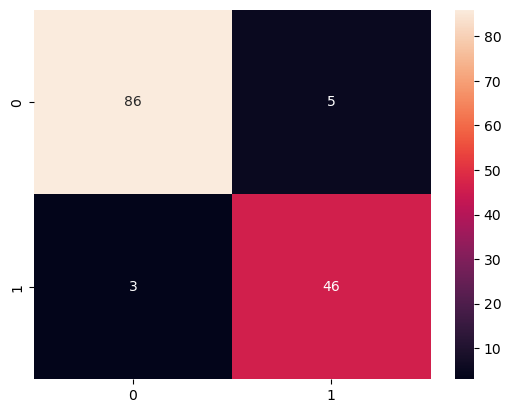

In [32]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# Generate classification report

In [33]:
from sklearn.metrics import classification_report

In [34]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96        91\n           1       0.90      0.94      0.92        49\n\n    accuracy                           0.94       140\n   macro avg       0.93      0.94      0.94       140\nweighted avg       0.94      0.94      0.94       140\n'

# Generate ROC curve and ROC AUC score.

0.9419152276295134


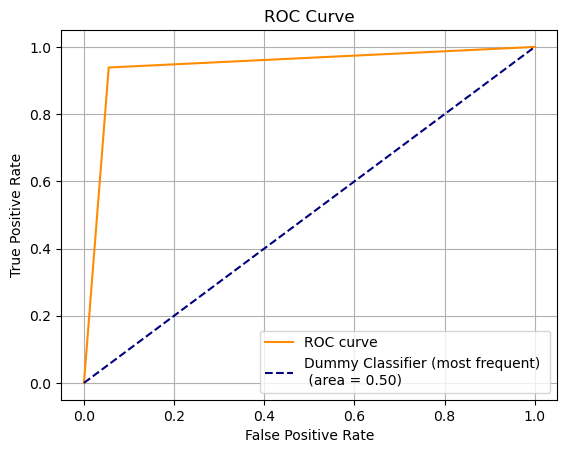

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
roc_auc=roc_auc_score(y_test, y_pred)
print(roc_auc)
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy='most_frequent', random_state=0)
clf.fit(x_train, y_train)
roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1] )
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, color='navy',linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()

In [36]:
from sklearn.model_selection import KFold,cross_val_score

In [37]:
kfold=KFold(n_splits=10,shuffle=True,random_state=5)
accuracy=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='accuracy')#should pass x and y completely and the model we doing any can be
precision=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='precision_macro')
f1=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='f1_macro')
recall=cross_val_score(KNN,feature_vectors,target_variable,cv=kfold,scoring='recall_macro')
results = []
for i in range(10):
    results.append([i+1, accuracy[i], precision[i], f1[i], recall[i]])
kfold_results = pd.DataFrame(results, columns=['Fold', 'Accuracy', 'Precision', 'F1 Score', 'Recall'])
kfold_results

,Fold,Accuracy,Precision,F1 Score,Recall
0,1,0.914286,0.909561,0.909561,0.909561
1,2,0.971429,0.958333,0.967623,0.979167
2,3,0.957143,0.955782,0.949652,0.944129
3,4,0.971429,0.969406,0.969406,0.969406
4,5,0.971429,0.978723,0.968297,0.960000
5,6,0.971429,0.952381,0.965000,0.980392
6,7,0.985714,0.989130,0.984301,0.980000
7,8,0.957143,0.950000,0.955612,0.965116
8,9,0.971429,0.980000,0.965986,0.954545
9,10,0.971014,0.969141,0.969141,0.969141


In [38]:
#calculating mean to see model performance
kfold_results.iloc[:,1:5].mean()

Accuracy     0.964244
Precision    0.961246
F1 Score     0.960458
Recall       0.961146
dtype: float64

# Rebuild the kNN Classification model using different values of k (3,4,5,6,7,8,9)

# Tabulate the results using the Tabulate package

In [36]:
from tabulate import tabulate

In [37]:
neighbours = [3, 4, 5, 6, 7, 8, 9]
train_size = [0.75, 0.70, 0.80]
accuracy = {}
precision = {}
f1 = {}
recall = {}

def KNN(neighbours, train_size, feature_vectors, target_variable):
    results = []

    for k in neighbours:
        for i in train_size:
            x_train, x_test, y_train, y_test = train_test_split(feature_vectors, target_variable, train_size=i, random_state=5)
            x_train = scale(x_train)
            x_test = scale(x_test)
            KNN = KNeighborsClassifier(n_neighbors=k)
            KNN.fit(x_train, y_train)
            y_pred = KNN.predict(x_test)
            accuracy[k] = accuracy_score(y_test, y_pred)
            precision[k] = precision_score(y_test, y_pred)
            f1[k] = f1_score(y_test, y_pred)
            recall[k] = recall_score(y_test, y_pred)
            results.append([k, i, accuracy[k], precision[k], f1[k], recall[k]])

    headers = ["K", "Train Size", "Accuracy", "Precision", "F1 Score", "Recall"]
    print(tabulate(results, headers=headers, tablefmt="grid"))

KNN(neighbours, train_size, feature_vectors, target_variable)

+-----+--------------+------------+-------------+------------+----------+
|   K |   Train Size |   Accuracy |   Precision |   F1 Score |   Recall |
+=====+==============+============+=============+============+==========+
|   3 |         0.75 |   0.948571 |    0.920635 |   0.928    | 0.935484 |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.7  |   0.947619 |    0.905405 |   0.924138 | 0.943662 |
+-----+--------------+------------+-------------+------------+----------+
|   3 |         0.8  |   0.942857 |    0.901961 |   0.92     | 0.938776 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.75 |   0.931429 |    0.916667 |   0.901639 | 0.887097 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.7  |   0.938095 |    0.914286 |   0.907801 | 0.901408 |
+-----+--------------+------------+-------------+------------+----------+
|   4 |         0.8  |   0.928571 |   

# Manual Implementation of KNN-Breast Cancer Dataset

In [48]:
df.iloc[0]#gives 0th row

Clump_thickness                5
Uniformity_Cell_Size           1
Uniformity_Cell_Shape          1
Marginal_Adhesion              1
Single_Epithelial_Cell_Size    2
Bare_Nuclei                    1
Bland_Chromatin                3
Normal_Nucleoli                1
Mitoses                        1
Class                          0
Name: 0, dtype: int64

In [49]:
#euclidean distance
def euclidist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [51]:
df.shape

(699, 10)

## taking the K=3 and split ratio(0.8,0.2)

In [52]:
X=df.iloc[:,:-1]
X

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [53]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

### Splitting(direct split)

In [54]:
#splitting x and y to train and test with ratio(.8,.2)
x_train=X.iloc[:int(X.shape[0]*.8),:]
x_test=X.iloc[int(X.shape[0]*.8):,:]
y_train=y.iloc[:int(y.shape[0]*.8)]
y_test=y.iloc[int(y.shape[0]*.8):]

In [55]:
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
554,3,1,1,1,2,1,1,1,1
555,4,3,1,1,2,1,4,8,1
556,5,2,2,2,1,1,2,1,1
557,5,1,1,3,2,1,1,1,1


In [56]:
x_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
559,5,1,1,1,2,1,2,1,1
560,5,1,1,1,2,1,3,1,1
561,5,1,1,1,2,1,3,1,1
562,1,1,1,1,2,1,3,1,1
563,3,1,1,1,2,1,2,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [57]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
554    0
555    0
556    0
557    0
558    0
Name: Class, Length: 559, dtype: int64

In [58]:
y_test

559    0
560    0
561    0
562    0
563    0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 140, dtype: int64

In [60]:
def KnearestNeighbour(x_train,y_train,x_test,k):
    y_pred=[]
    for i in range(x_test.shape[0]):
        class_0=0
        class_1=0
        dist=[]
        for j in range(x_train.shape[0]):
            d=euclidist(x_test.iloc[i],x_train.iloc[j])
            dist.append([d,y_train.iloc[j]])#for each distance and label(class of it)
        dist=sorted(dist)
        dist=dist[:k]#getting only k nearest neighbours
        for i in range(len(dist)):
            if(dist[i][1]==0):
                class_0+=1
            else:
                class_1+=1
        if(class_0>class_1):
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [61]:
y_pred=KnearestNeighbour(x_train,y_train,x_test,3)

In [62]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

In [63]:
#checking if y_pred and y_test are same
if(y_pred==list(y_test)):
    print("y_pred and y_test are same")
else:
    print("y_pred and y_test are not same")

y_pred and y_test are not same


In [64]:
#checking metrices
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("accuracy is",accuracy)
print("precision is",precision)
print("f1 is",f1)
print("recall is",recall)

accuracy is 0.9785714285714285
precision is 0.9705882352941176
f1 is 0.9565217391304348
recall is 0.9428571428571428


<Axes: >

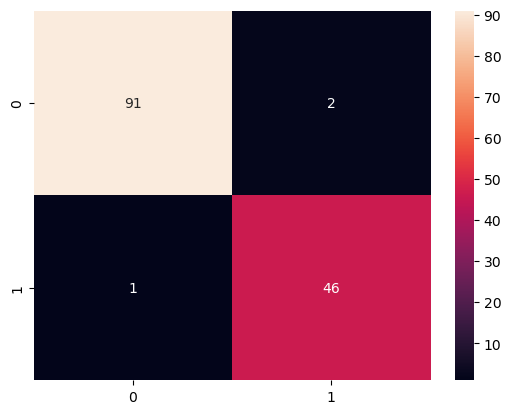

In [86]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### Splitting(random split)

In [66]:
indices = np.random.permutation(X.shape[0])

# Calculate the split index based on the desired ratio (80-20)
split_index = int(0.8 * X.shape[0])
x_train, x_test = X.iloc[indices[:split_index]], X.iloc[indices[split_index:]]
y_train, y_test = y.iloc[indices[:split_index]], y.iloc[indices[split_index:]]

In [67]:
x_train

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
136,4,1,1,1,2,1,2,1,1
214,10,10,10,10,3,10,10,6,1
580,5,1,2,1,2,1,2,1,1
579,1,1,1,1,2,1,3,1,1
210,8,10,10,10,5,10,8,10,6
...,...,...,...,...,...,...,...,...,...
86,3,3,6,4,5,8,4,4,1
252,6,3,3,5,3,10,3,5,3
288,6,1,3,1,4,5,5,10,1
268,10,8,8,2,3,4,8,7,8


In [68]:
x_test

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
362,3,2,2,1,4,3,2,1,1
93,1,1,1,1,2,1,2,1,1
271,5,1,1,1,2,1,3,1,1
665,1,1,1,1,2,1,1,1,1
667,3,1,1,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
678,1,1,1,1,2,1,1,1,1
419,2,3,1,1,5,1,1,1,1
280,3,1,1,1,2,1,3,1,1
597,5,1,3,1,2,1,3,1,1


In [69]:
y_train

136    0
214    1
580    0
579    0
210    1
      ..
86     1
252    0
288    1
268    1
223    1
Name: Class, Length: 559, dtype: int64

In [70]:
y_test

362    0
93     0
271    0
665    0
667    0
      ..
678    0
419    0
280    0
597    0
59     1
Name: Class, Length: 140, dtype: int64

#### Implementing KNN for random split

In [71]:
y_pred=KnearestNeighbour(x_train,y_train,x_test,3)

In [72]:
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [73]:
#checking if y_pred and y_test are same
if(y_pred==list(y_test)):
    print("y_pred and y_test are same")
else:
    print("y_pred and y_test are not same")

y_pred and y_test are not same


In [74]:
#checking metrices
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print("accuracy is",accuracy)
print("precision is",precision)
print("f1 is",f1)
print("recall is",recall)

accuracy is 0.9785714285714285
precision is 0.9583333333333334
f1 is 0.968421052631579
recall is 0.9787234042553191


### Seeing good metrices

<Axes: >

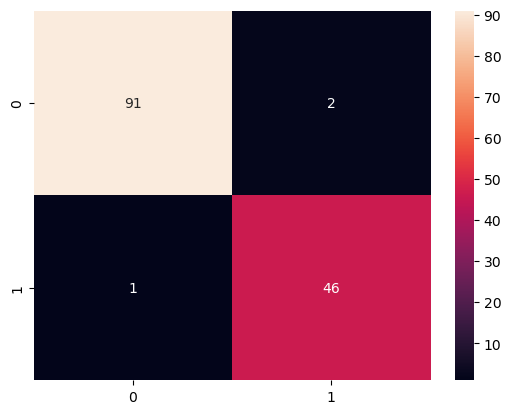

In [75]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### Good result for random splitting also

# For Predicting with unknown data

In [82]:
def Knnpredict(test,X,y,k):#X is dependent features and y is target variable
    #Using complete dataframe of depenedent features for good classification(with good accuracy) 
    class_0=0
    class_1=0
    dist=[]
    for j in range(X.shape[0]):
        d=euclidist(X.iloc[j],test)
        dist.append([d,y.iloc[j]])#for each distance and label(class of it)
    dist=sorted(dist)
    dist=dist[:k]#getting only k nearest neighbours
    for i in range(len(dist)):
        if(dist[i][1]==0):
            class_0+=1
        else:
            class_1+=1
    if(class_0>class_1):
        y_pred=0
    else:
        y_pred=1
    return y_pred

In [77]:
test=[3,2,1,2,4,3,2,3,1]#taking a sample with dependent features to predict

In [83]:
predicted_y=Knnpredict(test,X,y,3)

In [87]:
print(f'the Predicted value of Class for given input is {predicted_y}')

the Predicted value of Class for given input is 0
